In [6]:
import networkx as net
import urllib

# 空のグラフを作る
g = net.Graph()

# グラフにエッジを挿入する。ノードは自動的に挿入される
g.add_edge('a','b')
g.add_edge('b','c')
g.add_edge('c', 'a')

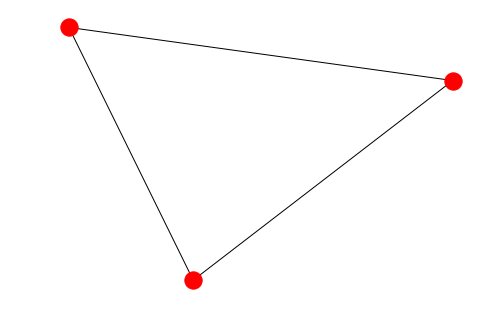

In [7]:
net.draw(g)

In [10]:
g.nodes()

NodeView(('a', 'b', 'c'))

In [9]:
g.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c')])

{('a', 'b'): Text(-0.300318,0.403962,'{}'),
 ('a', 'c'): Text(-0.199682,-0.462064,'{}'),
 ('b', 'c'): Text(0.5,0.0581022,'{}')}

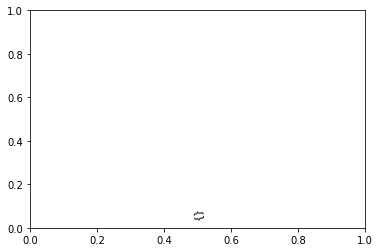

In [16]:
net.draw_networkx_edge_labels(g, pos=net.spring_layout(g))

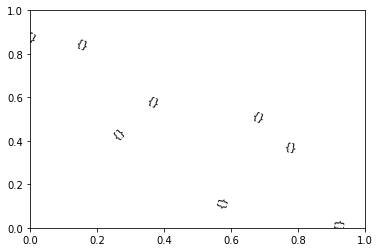

In [15]:
G = net.dodecahedral_graph()
edge_labels = net.draw_networkx_edge_labels(G, pos=net.spring_layout(G))

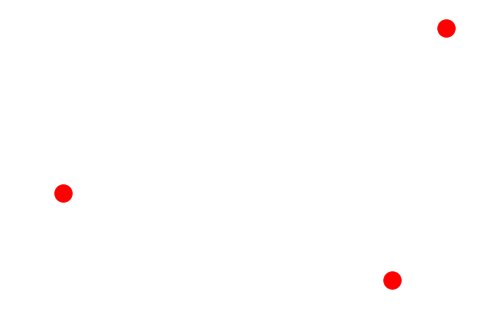

In [20]:
G = net.Graph()
G.add_nodes_from([(1, {'color': 'red'}), (2, {'color': 'blue'}), (3, {'color': 'red'})])
G.nodes(data = True)
net.draw(G)

In [ ]:
# curl -X get https://www.livejournal.com/misc/fdata.bml?user=valerois